In [53]:
import string
import nltk
import pandas as pd
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import os
import glob
import warnings
####
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
####
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
####
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [2]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.29.0
ipykernel        : 6.4.1
ipywidgets       : 7.6.5
jupyter_client   : 6.1.12
jupyter_core     : 4.8.1
jupyter_server   : 1.4.1
jupyterlab       : 3.2.1
nbclient         : 0.5.3
nbconvert        : 6.1.0
nbformat         : 5.1.3
notebook         : 6.4.5
qtconsole        : 5.1.1
traitlets        : 5.1.0


# 1. Determining working directory and reading csv files dynamically

In [3]:
os.chdir('/Users/kamran/Desktop/3-year/unigrams') 
for file in glob.glob(os.path.join( '*.csv')):
    variable_name = os.path.splitext(os.path.basename(file))[0]
    locals()[variable_name] = pd.read_csv(file)
    print(( file,locals()[variable_name].shape))

('keywords_uni_0.5div_1990_1992.csv', (500, 2))
('keywords_uni_0.5div_2017_2019.csv', (500, 2))
('keywords_uni_0.5div_1999_2001.csv', (500, 2))
('keywords_uni_0.5div_2005_2007.csv', (500, 2))
('keywords_uni_0.5div_2002_2004.csv', (500, 2))
('keywords_uni_0.5div_2014_2016.csv', (500, 2))
('keywords_uni_0.5div_2008_2010.csv', (500, 2))
('keywords_uni_0.5div_1993_1995.csv', (500, 2))
('keywords_uni_0.5div_2020_2022.csv', (500, 2))
('keywords_uni_0.5div_2011_2013.csv', (500, 2))
('keywords_uni_0.5div_1996_1998.csv', (500, 2))


# 2. Lemma, Stem, and POS_tag
We want to extrat Lemma, Stem, and POS_tag from extracted keywords.

# 2.1 Defining Lemma and Stem functions 

In [4]:
#Lemma function

def get_lemma(text):
    lem=WordNetLemmatizer().lemmatize
    return lem(text)

#Stem function

def get_stem(text):
    stem = PorterStemmer().stem
    return stem(text)

# 2.2 Feature extraction for unigrams

In [5]:
POS_tag_dic={} # Creating an empty dictionary for pos_tag

for file in glob.glob(os.path.join('*.csv')): #Dynamically read .csv files
    
    variable_name = os.path.splitext(os.path.basename(file))[0]
    locals()[variable_name]=locals()[variable_name].applymap(str)
    locals()[variable_name]["Lem"]=locals()[variable_name].Keyword.apply(lambda x : get_lemma(x))
    locals()[variable_name]['Stem']=locals()[variable_name].Keyword.apply(lambda x : get_stem(x))
    POS_tag_dic[file]=pd.DataFrame(nltk.tag.pos_tag(locals()[variable_name].Keyword))
    locals()[variable_name]=locals()[variable_name].join(POS_tag_dic[file])
    locals()[variable_name]=locals()[variable_name].drop(0, axis=1)
    locals()[variable_name]=locals()[variable_name].rename({1: 'POStag'}, axis=1)
    
    #Dynamically export .csv files
    
    with open('/Users/kamran/Desktop/3-year/unigrams/unigram/' + str(file) , 'w', encoding="utf-8") as out_file:
        out_file.write('Keyword,Score,Lem,Stem,POStag\n')
        line_to_write = (locals()[variable_name]['Keyword']) + ',' + (locals()[variable_name]['Score']) + ',' + (locals()[variable_name]['Lem']) + ',' + (locals()[variable_name]['Stem']) + ',' + (locals()[variable_name]['POStag']) + '\n'
        out_file.writelines(line_to_write)

# 2.3 Analysis Lemma-Keyword pairs unigram

In [6]:
Lemma_Keywords_dic = {} 
locals()[variable_name].set_index("Lem", drop=True, inplace=True)
locals()[variable_name].drop(['Score','Stem','POStag'], axis=1, inplace=True)
for file in glob.glob(os.path.join('*.csv')):
    Lemma_Keywords_dic[file] = locals()[variable_name].to_dict()
#Lemma_Keywords_dic['keywords_uni_0.5div_1996_1998.csv']

# 2.4 IDF-KeyBERT score for unigrams 

We want to plot IDF-KeyBERT graph for top 100 high keywords gained the highest score in each chunk.



In [8]:
os.chdir('/Users/kamran/Desktop/3-year') 
df=pd.read_csv('Scopus_exp_processed.csv',encoding='latin-1')

In [9]:
df.head()

,Year,Titles,Abstract,Authors,Authors with affiliations,Author Keywords,Indexed Keywords,EID,Funding Details,Funding Texts,Document Type,Open Access,text,lower_text
0,2022,Energy Efficient Layered Cluster Head Rotation...,Energy efficiency is of paramount concern in u...,Datta A.; Dasgupta M.,"Datta A., Department of Computer Applications,...",Cluster-head; Energy consumption; Routing prot...,Energy efficiency; Internet protocols; Network...,2-s2.0-85128393697,NaN,NaN,Article,NaN,Energy Efficient Layered Cluster Head Rotation...,energy efficient layered cluster head rotation...
1,2022,Underwater object detection using collaborativ...,"Despite recent progress in deep learning, unde...",Cai S.; Li G.; Shan Y.,"Cai S., School of Applied Science, Beijing Inf...",Collaborative learning; Noisy samples; Underwa...,Benchmarking; Deep learning; Object recognitio...,2-s2.0-85132754967,"National Natural Science Foundation of China, ...",This work was supported by the National Natura...,Article,NaN,Underwater object detection using collaborativ...,underwater object detection using collaborativ...
2,2022,Characteristics of Miniaturized Monolithic PMN...,"In this study, the deformation and stress dist...",Liu X.; Lu X.; Sun X.; Cui S.; Liu J.,"Liu X., School of Electronic Information Engin...",detection characteristics; Finite element meth...,Ferroelectric ceramics; Ferroelectricity; Lead...,2-s2.0-85128857675,"Fuzhou Dayu Electric Technology Co., Ltd.",The authors are extremely grateful to Professo...,Article,NaN,Characteristics of Miniaturized Monolithic PMN...,characteristics of miniaturized monolithic pmn...
3,2022,Methodology for Phytoplankton Taxonomic Group ...,This paper presents the absorbance and fluores...,Carvalho D.A.M.; Pinto V.C.; Sousa P.J.; Magal...,"Carvalho D.A.M., Center for MicroElectromechan...",lab-on-a-chip; optical methods; photosynthetic...,NaN,2-s2.0-85131578035,"Interreg VA Spain-Portugal, (NORTE-08-5369-FSE...",Funding text 1: Funding: This work was co-fina...,Article,All Open Access; Gold Open Access,Methodology for Phytoplankton Taxonomic Group ...,methodology for phytoplankton taxonomic group ...
4,2022,Physics-informed neural network for polarimetr...,Utilizing the polarization analysis in underwa...,Hu H.; Han Y.; Li X.; Jiang L.; Che L.; Liu T....,"Hu H., Key Laboratory of Opto-electronics Info...",NaN,Deep neural networks; Image enhancement; Polar...,2-s2.0-85131781336,"National Natural Science Foundation of China, ...",Funding. National Natural Science Foundation o...,Article,All Open Access; Gold Open Access,Physics-informed neural network for polarimetr...,physics-informed neural network for polarimetr...


In [10]:
df.Year.min(), df.Year.max()

(1990, 2022)

In [11]:
for year in np.arange(1990, 2023, step = 3): #breaking data to 3-year chunks
    variable_name_1="df_" + str(year)+"_"+str(year+2)
    locals()[variable_name_1]= df[(df.Year>=year) & (df.Year<=(year+2))]
    print ("%d size %s" %(year,locals()[variable_name_1].shape))

1990 size (79, 14)
1993 size (108, 14)
1996 size (174, 14)
1999 size (190, 14)
2002 size (365, 14)
2005 size (749, 14)
2008 size (958, 14)
2011 size (1192, 14)
2014 size (1690, 14)
2017 size (2326, 14)
2020 size (2717, 14)


In [12]:
def preprocess(sentence):   #cleaning text
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

In [13]:
count = CountVectorizer(stop_words='english')
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#breaking data to 3-year chunks

for year in np.arange(1990, 2023, step = 3): 
    variable_name_1="df_" + str(year)+"_"+str(year+2)
    variable_name_2="list_" + str(year)+"_"+str(year+2)
    locals()[variable_name_1]= df[(df.Year>=year) & (df.Year<=(year+2))]
    
    #cleaning each chunk and turning it to list
    locals()[variable_name_1]['cleanText']=locals()[variable_name_1]['text'].apply(lambda x : preprocess(x)) 
    locals()[variable_name_2]=locals()[variable_name_1]['cleanText'].to_list() 
    
    # calculating IDF score 
    word_count=count.fit_transform(locals()[variable_name_2])
    tfidf_transformer=tfidf_transformer.fit(word_count)
    variable_name_3="df_idf" + str(year)+"_"+str(year+2)
    locals()[variable_name_3] = pd.DataFrame(tfidf_transformer.idf_, index=count.get_feature_names(),columns=["idf_weights"])
    
    # Calculating TF-IDF 
    tfidf=TfidfVectorizer().fit(locals()[variable_name_2])
    count_tokens=tfidf.get_feature_names_out()
    article_vect = tfidf.transform(locals()[variable_name_2])
    variable_name_4="df_tfidf" + str(year)+"_"+str(year+2)
    locals()[variable_name_4]=pd.DataFrame(data=article_vect.tocsr().sum(axis=0),columns=count_tokens)
    locals()[variable_name_4] = locals()[variable_name_4].T.sort_values(ascending=False, by=[0])
    locals()[variable_name_4]['word'] = locals()[variable_name_4].index
    locals()[variable_name_4]['tf-idf'] = locals()[variable_name_4][0]
    locals()[variable_name_4]=locals()[variable_name_4].drop(['word', 0],axis=1)
    
    # Calculating TF (TF-IDF/IDF) 
    variable_name_5="df_final" + str(year)+"_"+str(year+2)
    locals()[variable_name_5]=pd.merge(locals()[variable_name_3], locals()[variable_name_4], left_index=True, right_index=True)
    locals()[variable_name_5]['tf']=locals()[variable_name_5]['tf-idf']/locals()[variable_name_5]['idf_weights']
    
    #locals()[variable_name_5].info()



/var/folders/9k/3zsz3fc107gd6tvb4svwc8_h0000gn/T/ipykernel_60391/569281092.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locals()[variable_name_1]['cleanText']=locals()[variable_name_1]['text'].apply(lambda x : preprocess(x))
/Users/kamran/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
os.chdir('/Users/kamran/Desktop/3-year/unigrams')  # Reading KeyBERT extracted keywords datasets
for file in glob.glob(os.path.join( '*.csv')):
    variable_name = os.path.splitext(os.path.basename(file))[0]
    locals()[variable_name] = pd.read_csv(file)
    print(( file,locals()[variable_name].shape))

('keywords_uni_0.5div_1990_1992.csv', (500, 2))
('keywords_uni_0.5div_2017_2019.csv', (500, 2))
('keywords_uni_0.5div_1999_2001.csv', (500, 2))
('keywords_uni_0.5div_2005_2007.csv', (500, 2))
('keywords_uni_0.5div_2002_2004.csv', (500, 2))
('keywords_uni_0.5div_2014_2016.csv', (500, 2))
('keywords_uni_0.5div_2008_2010.csv', (500, 2))
('keywords_uni_0.5div_1993_1995.csv', (500, 2))
('keywords_uni_0.5div_2020_2022.csv', (500, 2))
('keywords_uni_0.5div_2011_2013.csv', (500, 2))
('keywords_uni_0.5div_1996_1998.csv', (500, 2))


In [15]:
locals()[variable_name]=locals()[variable_name].set_index('Keyword') 
locals()[variable_name]=locals()[variable_name].head(100) #choosing top 100 keywords
for year in np.arange(1990, 2023, step = 3):
    variable_name_5="df_final" + str(year)+"_"+str(year+2)
    # Merging generated TFIDF dataset with KeyBERT keywords dataset based on common index
    locals()[variable_name_5]=pd.merge(locals()[variable_name_5], locals()[variable_name], left_index=True, right_index=True)

    

In [51]:
#Generating dynamic graph (KeyBERT score-IDF) for each chunk
for year in np.arange(1990, 2023, step = 3):
    variable_name_5="df_final" + str(year)+"_"+str(year+2)
    variable_name_6="plot_interactive" + str(year)+"_"+str(year+2)
    locals()[variable_name_6] = px.scatter(locals()[variable_name_5], x="Score", y="idf_weights", size='tf',title=str(year)+"_"+str(year+2))
    #creating html file for interactive graph
    pio.write_html(locals()[variable_name_6], file= '/Users/kamran/Desktop/3-year/unigrams/plots/interactive/'+"interactive_plot_unigrams_"+str(year)+"_"+str(year+2)+".html", auto_open=False)
    #locals()[variable_name_6].show() #showing interactive graph in notebook

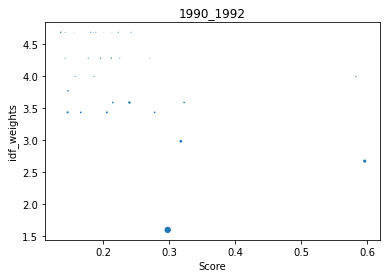

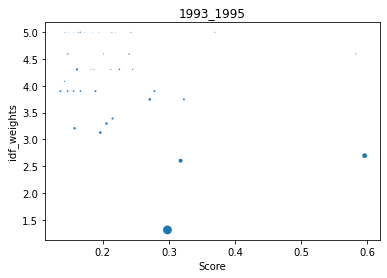

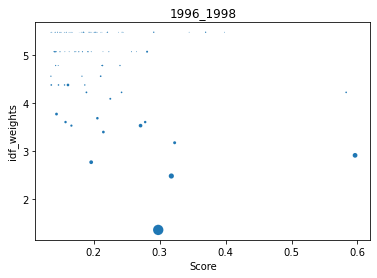

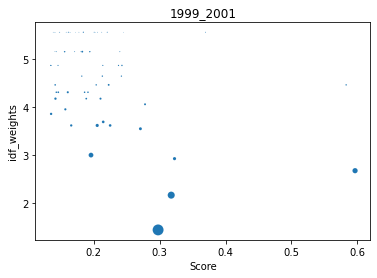

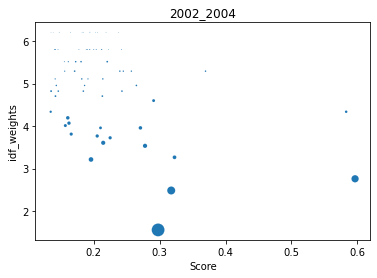

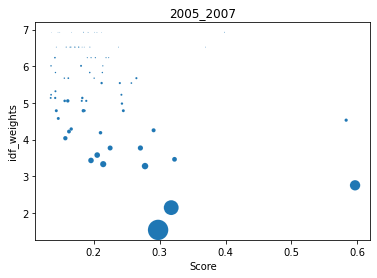

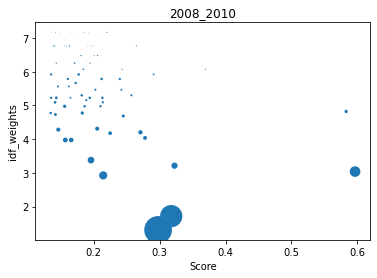

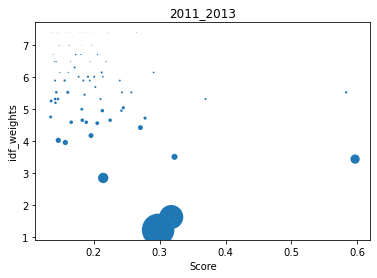

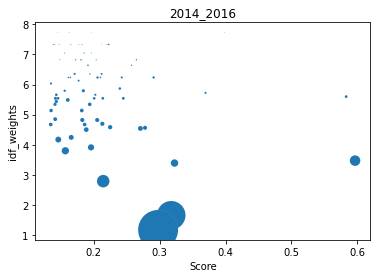

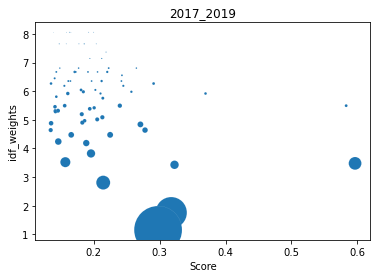

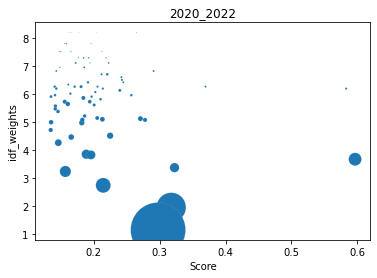

In [73]:
#Generating static graph (KeyBERT score-IDF) for each chunk
for year in np.arange(1990, 2023, step = 3):
    variable_name_5="df_final" + str(year)+"_"+str(year+2)
    variable_name_7="plot_static" + str(year)+"_"+str(year+2)
    locals()[variable_name_7] = sns.scatterplot(data=locals()[variable_name_5], x="Score", y="idf_weights", s=(locals()[variable_name_5].tf)*20,legend=False).set(title=str(year)+"_"+str(year+2))
    #creating jpg file for static graph
    plt.savefig('/Users/kamran/Desktop/3-year/unigrams/plots/static/'+"static_plot_unigrams_"+str(year)+"_"+str(year+2)+".jpg")
    plt.show() #showing static graph in notebook
